<a href="https://colab.research.google.com/github/brenocsp/intro-data-science/blob/main/lists/4-exploring-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Manipulando e limpando dados
Esta seção marca uma mudança sutil. Até agora, apresentamos ideias e técnicas para prepará-lo com uma caixa de ferramentas de técnicas para lidar com situações do mundo real. Agora vamos começar a usar algumas dessas ferramentas e, ao mesmo tempo, dar algumas idéias sobre como e quando usá-las em seu próprio trabalho com dados.

Os dados do mundo real são confusos. Provavelmente, você precisará combinar várias fontes de dados para obter os dados que realmente deseja. Os dados dessas fontes estarão incompletos. E provavelmente não será formatado exatamente da maneira que você deseja para realizar sua análise. É por esses motivos que a maioria dos cientistas de dados dirá que cerca de 80% de qualquer projeto é gasto apenas para colocar os dados em um formulário pronto para análise.

## Explorando informações do `DataFrame`

&gt; **Objetivo de aprendizagem:** Ao final desta subseção, você deve estar confortável para encontrar informações gerais sobre os dados armazenados nos DataFrames do pandas.

Depois de carregar seus dados no pandas, é mais provável que eles estejam em um `DataFrame`. No entanto, se o conjunto de dados em seu `DataFrame` tem 60.000 linhas e 400 colunas, como você começa a ter uma noção do que está trabalhando? Felizmente, o pandas fornece algumas ferramentas convenientes para examinar rapidamente informações gerais sobre um `DataFrame`, além das primeiras e últimas linhas.

Para explorar essa funcionalidade, importaremos a biblioteca Python scikit-learn e usaremos um conjunto de dados icônico que todo cientista de dados já viu centenas de vezes: o conjunto de dados * Iris * do biólogo britânico Ronald Fisher usado em seu artigo de 1936 "O uso de múltiplos medições em problemas taxonômicos ":

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

### `DataFrame.info`
Vamos dar uma olhada neste conjunto de dados para ver o que temos:

In [2]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


A partir disso, sabemos que o conjunto de dados * Iris * tem 150 entradas em quatro colunas. Todos os dados são armazenados como números de ponto flutuante de 64 bits.


### `DataFrame.head`
A seguir, vamos ver como são as primeiras linhas do nosso `DataFrame`:


In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### `DataFrame.tail`
O outro lado de DataFrame.head é DataFrame.tail, que retorna as últimas cinco linhas de um DataFrame:


In [4]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Na prática, é útil examinar facilmente as primeiras linhas ou as últimas linhas de um DataFrame, principalmente quando você está procurando outliers em conjuntos de dados ordenados.

&gt; Conclusão: mesmo olhando para os metadados sobre as informações em um DataFrame ou os primeiros e os últimos valores em um, você pode ter uma ideia imediata sobre o tamanho, a forma e o conteúdo dos dados com os quais está lidando.

## Lidando com dados ausentes (missing data)

&gt; **Objetivo de aprendizagem:** Ao final desta subseção, você deve saber como substituir ou remover valores nulos de DataFrames.

Na maioria das vezes, os conjuntos de dados que você deseja usar (ou deve usar) têm valores ausentes. A maneira como os dados ausentes são tratados traz consigo compensações sutis que podem afetar sua análise final e os resultados do mundo real.

O Pandas lida com valores ausentes de duas maneiras. O primeiro que você viu antes nas seções anteriores: `NaN` ou Not a Number. Na verdade, este é um valor especial que faz parte da especificação de ponto flutuante IEEE e é usado apenas para indicar valores de ponto flutuante ausentes.

Para valores ausentes além de flutuantes, o pandas usa o objeto Python `Nenhum`. Embora possa parecer confuso encontrar dois tipos diferentes de valores que dizem essencialmente a mesma coisa, existem razões programáticas sólidas para essa escolha de design e, na prática, seguir esse caminho permite que os pandas forneçam um bom compromisso para a grande maioria dos casos. Não obstante, `Nenhum` e` NaN` trazem restrições que você precisa estar ciente sobre como eles podem ser usados.

### `None`: non-float missing data
Como `None` vem do Python, ele não pode ser usado em matrizes NumPy e pandas que não são do tipo de dados `'object'`. Lembre-se de que as matrizes NumPy (e as estruturas de dados nos pandas) podem conter apenas um tipo de dados. Isso é o que lhes dá um tremendo poder para dados em grande escala e trabalho computacional, mas também limita sua flexibilidade. Esses arrays precisam fazer upcast para o “menor denominador comum”, o tipo de dados que abrangerá tudo no array. Quando `None` está no array, significa que você está trabalhando com objetos Python.

Para ver isso em ação, considere o seguinte exemplo de array (observe o `dtype` para ele):

In [5]:
import numpy as np

example1 = np.array([2, None, 6, 8])
example1

array([2, None, 6, 8], dtype=object)

A realidade dos tipos de dados upcast traz dois efeitos colaterais. Primeiro, as operações serão realizadas no nível do código Python interpretado, em vez do código NumPy compilado. Essencialmente, isso significa que quaisquer operações envolvendo `Series` ou` DataFrames` com `None` neles serão mais lentas. Embora você provavelmente não notaria esse impacto no desempenho, para grandes conjuntos de dados ele pode se tornar um problema.

O segundo efeito colateral decorre do primeiro. Porque `None` essencialmente arrasta` Series` ou `DataFrames` de volta ao mundo do Python simples, usando agregações NumPy / pandas como` sum () `ou` min () `em matrizes que contêm um valor ``None`` geralmente produzirá um erro:

In [6]:
example1.sum()

TypeError: ignored

### `NaN`: missing float values

Em contraste com `None`, NumPy (e, portanto, pandas) suporta `NaN` para suas operações e ufuncs vetorizadas rápidas. A má notícia é que qualquer aritmética realizada em `NaN` sempre resulta em `NaN`. Por exemplo:

In [ ]:
np.nan + 1

In [ ]:
np.nan * 0

A boa notícia: agregações executadas em arrays com `NaN` neles não apresentam erros. A má notícia: os resultados não são uniformemente úteis:


In [ ]:
example2 = np.array([2, np.nan, 6, 8]) 
example2.sum(), example2.min(), example2.max()

No processo de upcasting de tipos de dados para estabelecer homogeneidade de dados em `Series` e` DataFrames`, o pandas irá alternar voluntariamente os valores ausentes entre `None` e` NaN`. Por causa desse recurso de design, pode ser útil pensar em `None` e` NaN` como dois sabores diferentes de "nulo" em pandas. Na verdade, alguns dos métodos principais que você usará para lidar com os valores ausentes nos pandas refletem essa ideia em seus nomes:

- `isnull ()`: Gera uma máscara booleana indicando valores ausentes
- `notnull ()`: oposto de `isnull ()`
- `dropna ()`: Retorna uma versão filtrada dos dados
- `fillna ()`: retorna uma cópia dos dados com os valores ausentes preenchidos ou imputados

Esses são métodos importantes para dominar e se familiarizar com eles, portanto, vamos examiná-los com alguma profundidade.

### Detectando valores nulos
Ambos `isnull ()` e `notnull ()` são seus métodos principais para detectar dados nulos. Ambos retornam máscaras booleanas sobre seus dados.

In [ ]:
example3 = pd.Series([0, np.nan, '', None])

In [ ]:
example3.isnull()

Observe atentamente a saída. Alguma coisa disso te surpreende? Embora `0` seja um nulo aritmético, é um número inteiro perfeitamente bom e o pandas o considera como tal. `''` é um pouco mais sutil. Embora o tenhamos usado na Seção 1 para representar um valor de string vazio, ele é, no entanto, um objeto de string e não uma representação de nulo no que diz respeito aos pandas.

Agora, vamos virar isso e usar esses métodos de uma maneira mais parecida com a que você vai usar na prática. Você pode usar máscaras booleanas diretamente como um índice `` Series`` ou `` DataFrame``, que pode ser útil ao tentar trabalhar com valores ausentes (ou presentes) isolados.

** Conclusão importante **: os métodos `isnull ()` e `notnull ()` produzem resultados semelhantes quando você os usa em `DataFrame`s: eles mostram os resultados e o índice desses resultados, o que o ajudará enormemente enquanto você luta com seus dados.


### Eliminando valores nulos

Além de identificar valores ausentes, o pandas fornece um meio conveniente de remover valores nulos de `Series` e` DataFrame`s. (Particularmente em grandes conjuntos de dados, muitas vezes é mais aconselhável simplesmente remover os valores [NA] ausentes de sua análise do que lidar com eles de outras maneiras.) Para ver isso em ação, vamos voltar ao `exemplo3`:

In [ ]:
example3 = example3.dropna()
example3

Observe que isso deve ser parecido com a saída de `example3 [example3.notnull ()]`. A diferença aqui é que, em vez de apenas indexar os valores mascarados, `dropna` removeu esses valores ausentes do` Series` `example3`.

Como os `DataFrame`s têm duas dimensões, eles oferecem mais opções para descartar dados.

In [ ]:
example4 = pd.DataFrame([[1,      np.nan, 7], 
                         [2,      5,      8], 
                         [np.nan, 6,      9]])
example4

(Você notou que os pandas transformam duas das colunas em flutuadores para acomodar os `NaN`s?)

Você não pode descartar um único valor de um `DataFrame`, então você deve descartar linhas ou colunas inteiras. Dependendo do que você está fazendo, você pode querer fazer um ou outro e, portanto, o pandas oferece opções para ambos. Como na ciência de dados, as colunas geralmente representam variáveis ​​e as linhas representam observações, é mais provável que você elimine linhas de dados; a configuração padrão para `dropna ()` é descartar todas as linhas que contenham quaisquer valores nulos:

In [ ]:
example4.dropna()

Se necessário, você pode eliminar os valores NA das colunas. Use `axis = 1` para fazer isso:




In [ ]:
example4.dropna(axis='columns')

Observe que isso pode eliminar muitos dados que você pode querer manter, principalmente em conjuntos de dados menores. E se você apenas quiser descartar linhas ou colunas que contenham vários ou até mesmo todos os valores nulos? Você especifica essas configurações em `dropna` com os parâmetros` how` e `thresh`.

Por padrão, `how = 'any'` (se você gostaria de verificar por si mesmo ou ver quais outros parâmetros o método possui, execute` example4.dropna? `Em uma célula de código). Você pode, alternativamente, especificar `how = 'all'` de modo a descartar apenas linhas ou colunas que contenham todos os valores nulos. Vamos expandir nosso exemplo `DataFrame` para ver isso em ação.

In [ ]:
example4[3] = np.nan
example4

O parâmetro `thresh` oferece um controle mais refinado: você define o número de valores * não nulos * que uma linha ou coluna precisa ter para ser mantida:

In [ ]:
example4.dropna(axis='rows', thresh=3)


Aqui, a primeira e a última linha foram eliminadas, porque contêm apenas dois valores não nulos.


### Preenchendo valores nulos

Dependendo do seu conjunto de dados, às vezes pode fazer mais sentido preencher valores nulos com valores válidos em vez de descartá-los. Você poderia usar `isnull` para fazer isso no lugar, mas pode ser trabalhoso, principalmente se você tiver muitos valores a preencher. Por ser uma tarefa comum em ciência de dados, o pandas fornece `fillna`, que retorna uma cópia do` Series` ou `DataFrame` com os valores ausentes substituídos por um de sua escolha. Vamos criar outro exemplo `Series` para ver como isso funciona na prática.

In [ ]:
example5 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
example5

Você pode preencher todas as entradas nulas com um único valor, como `0`:




In [ ]:
example5.fillna(0)

Você pode ser criativo sobre como usar `fillna`. Por exemplo, vamos olhar para `example4` novamente, mas desta vez vamos preencher os valores ausentes com a média de todos os valores no` DataFrame`:

In [ ]:
example4.fillna(example4.mean())

&gt; ** Takeaway: ** Existem várias maneiras de lidar com valores ausentes em seus conjuntos de dados. A estratégia específica que você usa (removê-los, substituí-los ou mesmo como você os substitui) deve ser ditada pelas particularidades desses dados. Você desenvolverá um senso melhor de como lidar com os valores ausentes quanto mais você manipular e interagir com os conjuntos de dados.

## Removendo dados duplicados

&gt; ** Objetivo de aprendizado: ** Ao final desta subseção, você deve estar confortável em identificar e remover valores duplicados de DataFrames.

Além de dados ausentes, você frequentemente encontrará dados duplicados em conjuntos de dados do mundo real. Felizmente, o pandas oferece um meio fácil de detectar e remover entradas duplicadas.

### Identificando duplicatas: `duplicated`

Você pode localizar facilmente valores duplicados usando o método `duplicated` em pandas, que retorna uma máscara booleana indicando se uma entrada em um` DataFrame` é uma duplicata de um ealier. Vamos criar outro exemplo de `DataFrame` para ver isso em ação.

In [ ]:
example6 = pd.DataFrame({'letters': ['A','B'] * 2 + ['B'],
                         'numbers': [1, 2, 1, 3, 3]})
example6

In [ ]:
example6.duplicated()

### Dropping duplicates: `drop_duplicates`
`drop_duplicates` simplesmente retorna uma cópia dos dados para os quais todos os valores `duplicados` são` False`:

In [ ]:
example6.drop_duplicates()

Ambos `duplicated` e` drop_duplicates` consideram todas as colunas, mas você pode especificar que eles examinem apenas um subconjunto de colunas em seu `DataFrame`:

In [ ]:
example6.drop_duplicates(['letters'])

In [ ]:
example6.drop_duplicates?

&gt; ** Conclusão: ** Remover dados duplicados é uma parte essencial de quase todos os projetos de ciência de dados. Dados duplicados podem alterar os resultados de suas análises e fornecer resultados espúrios!


## Combinando conjuntos de dados: merge e join

&gt; ** Objetivo de aprendizagem: ** Ao final desta subseção, você deve ter um conhecimento geral das várias maneiras de combinar `DataFrame`s.

Suas análises mais interessantes geralmente virão de dados combinados de mais de uma fonte. Por causa disso, o pandas oferece vários métodos de mesclar e unir conjuntos de dados para facilitar esse trabalho necessário:
 - ** `pandas.merge` ** conecta linhas em` DataFrame`s com base em uma ou mais chaves.
 - ** `pandas.concat` ** concatena ou“ empilha ”objetos ao longo de um eixo.
 - O método de instância ** `combine_first` ** permite que você junte os dados sobrepostos para preencher os valores ausentes em um objeto com os valores de outro.

Vamos examinar a fusão de dados primeiro, porque será mais familiar para os participantes do curso que já estão familiarizados com SQL ou outros bancos de dados relacionais.

### Categorias de junções (joins)

`merge` realiza vários tipos de junções: * um-para-um *, * muitos-para-um * e * muitos-para-muitos *. Você usa a mesma chamada de função básica para implementar todos eles e examinaremos todos os três (porque você precisará de todos os três como algum ponto em sua pesquisa de dados, dependendo dos dados). Começaremos com junções de um para um porque geralmente são o exemplo mais simples.

#### Joins um a um

Considere combinar dois `DataFrame`s que contêm informações diferentes sobre os mesmos funcionários em uma empresa:

In [ ]:
df1 = pd.DataFrame({'employee': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'group': ['Accounting', 'Marketing', 'Marketing', 'HR']})
df1

In [ ]:
df2 = pd.DataFrame({'employee': ['Mary', 'Stu', 'Gary', 'Sue'],
                    'hire_date': [2008, 2012, 2017, 2018]})
df2

Combine essas informações em um único `DataFrame` usando a função` merge`:

In [ ]:
df3 = pd.merge(df1, df2)
df3

O Pandas fez a junção baseado na coluna `employee` porque era a única coluna comum a` df1` e `df2`. (Observe também que os índices originais de `df1` e` df2` foram descartados por `merge`; este é geralmente o caso com mesclagens, a menos que você conduza por índice, que discutiremos mais tarde.)

#### Joins muitos para um
Uma junção de muitos para um é como uma junção de um para um, exceto que uma das duas colunas principais contém entradas duplicadas. O DataFrame resultante de tal junção preservará essas entradas duplicadas conforme apropriado:

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Marketing', 'HR'],
                    'supervisor': ['Carlos', 'Giada', 'Stephanie']})
df4

In [ ]:
pd.merge(df3, df4)

O `DataFrame` resultante tem uma coluna adicional para` supervisor`; essa coluna tem uma ocorrência extra de 'Giada' que não ocorreu em `df4` porque mais de um funcionário no` DataFrame` mesclado trabalha no grupo 'Marketing'.

Observe que não especificamos em qual coluna juntar. Quando você não especifica essas informações, `merge` usa os nomes das colunas sobrepostas como as chaves. No entanto, isso pode ser ambíguo; várias colunas podem atender a essa condição. Por esse motivo, é uma boa prática especificar explicitamente em qual chave juntar. Você pode fazer isso com o parâmetro `on`:

In [ ]:
pd.merge(df3, df4, on='group')

#### Muitos para muitos joins
O que acontecerá se as colunas-chave em ambos os DataFrames que você está unindo contiverem duplicatas? Isso dá a você uma junção de muitos para muitos:

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Marketing', 'Marketing', 'HR', 'HR'],
                    'core_skills': ['math', 'spreadsheets', 'writing', 'communication',
                               'spreadsheets', 'organization']})
df5

In [ ]:
pd.merge(df1, df5, on='group')

Novamente, para evitar ambigüidade quanto a qual coluna unir, é uma boa idéia dizer explicitamente ao `merge` qual usar com o parâmetro` on`.

#### `left_on` and `right_on` keywords
E se você precisar mesclar dois conjuntos de dados sem nomes de coluna compartilhados? Por exemplo, e se você estiver usando um conjunto de dados em que o nome do funcionário é rotulado como 'nome' em vez de 'funcionário'? Nesses casos, você precisará usar as palavras-chave `left_on` e `right_on`
 para especificar os nomes das colunas nas quais unir:

In [ ]:
df6 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df6

In [ ]:
pd.merge(df1, df6, left_on="employee", right_on="name")

### Concatenação em NumPy
A concatenação em pandas é construída a partir da funcionalidade de concatenação para matrizes NumPy. Esta é a aparência da concatenação NumPy:
 - Para matrizes unidimensionais:

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])


 - Para matrizes bidimensionais:

In [ ]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

Observe que o parâmetro `axis = 1` faz com que a concatenação ocorra ao longo de colunas ao invés de linhas. A concatenação em pandas é semelhante a esta.

### Concatenação em pandas

Pandas tem uma função, `pd.concat ()` que pode ser usada para uma concatenação simples de objetos `Series` ou` DataFrame` de maneira semelhante a `np.concatenate ()` com ndarrays.

In [ ]:
ser1 = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
ser2 = pd.Series(['d', 'e', 'f'], index=[4, 5, 6])
pd.concat([ser1, ser2])

Ele também concatena objetos de dimensões superiores, como `` DataFrame``s:

In [ ]:
df9 = pd.DataFrame({'A': ['a', 'c'],
                    'B': ['b', 'd']})
df9

In [ ]:
pd.concat([df9, df9])

Observe que `pd.concat` preservou a indexação, embora isso signifique que ela foi duplicada. Você pode ter os resultados reindexados (e evitar possíveis confusões no caminho) assim:

In [ ]:
pd.concat([df9, df9], ignore_index=True)

Por padrão, `pd.concat` concatena a linha dentro do` DataFrame` (ou seja, `axis = 0` por padrão). Você pode especificar o eixo ao longo do qual concatenar:

In [ ]:
pd.concat([df9, df9], axis=1)

### Concatenação com junções
Assim como fez com a mesclagem acima, você pode usar junções internas e externas ao concatenar DataFrames com diferentes conjuntos de nomes de coluna.

In [ ]:
df10 = pd.DataFrame({'A': ['a', 'd'],
                     'B': ['b', 'e'],
                     'C': ['c', 'f']})
df10

In [ ]:
df11 = pd.DataFrame({'B': ['u', 'x'],
                     'C': ['v', 'y'],
                     'D': ['w', 'z']})
df11

In [ ]:
pd.concat([df10, df11])

Como vimos anteriormente, a junção padrão para isso é uma junção externa e as entradas para as quais nenhum dado está disponível são preenchidas com valores `NaN`. Você também pode fazer uma junção interna:

In [ ]:
pd.concat([df10, df11], join='inner')

Outra opção é especificar diretamente o índice das colunas restantes usando o argumento `join_axes`, que obtém uma lista de objetos de índice. Aqui, especificaremos que as colunas retornadas devem ser as mesmas da primeira entrada (`df10`):

In [ ]:
# pd.concat([df10, df11], join_axes=[df10.columns])

pd.concat([df10, df11.reindex(columns = df10.columns)], ignore_index = True)

#### `append()`

Como a concatenação direta de array é tão comum, os objetos `` Series`` e `` DataFrame`` têm um método `` append`` que pode realizar a mesma coisa em menos teclas. Por exemplo, em vez de chamar `` pd.concat ([df9, df9]) ``, você pode simplesmente chamar `` df9.append (df9) ``:

In [ ]:
df9.append(df9)

** Ponto importante **: Ao contrário dos métodos `append ()` e `extend ()` das listas Python, o método `append ()` no pandas não modifica o objeto original. Em vez disso, ele cria um novo objeto com os dados combinados.

&gt; ** Conclusão: ** uma grande parte do valor que você pode fornecer como cientista de dados vem da conexão de vários conjuntos de dados, muitas vezes díspares, para encontrar novos insights. Aprender como juntar e mesclar dados é, portanto, uma parte essencial do seu conjunto de habilidades.

## Estatísticas exploratórias e visualização

&gt; ** Objetivo de aprendizagem: ** Ao final desta subseção, você deve estar familiarizado com algumas das maneiras de explorar visualmente os dados armazenados em `DataFrame`s.

Freqüentemente, ao investigar um novo conjunto de dados, é inestimável obter informações de alto nível sobre o que o conjunto de dados contém. Anteriormente nesta seção, discutimos o uso de métodos como `DataFrame.info`,` DataFrame.head` e `DataFrame.tail` para examinar alguns aspectos de um` DataFrame`. Embora esses métodos sejam essenciais, eles são, por si próprios, muitas vezes insuficientes para obter informações suficientes para saber como abordar um novo conjunto de dados. É aqui que entram as estatísticas exploratórias e as visualizações dos conjuntos de dados.

Para ver o que queremos dizer em termos de obtenção de insights exploratórios (visual e numericamente), vamos nos aprofundar em um dos conjuntos de dados que vêm com a biblioteca scikit-learn, o Boston Housing Dataset:

In [7]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



Este conjunto de dados contém informações coletadas do U.S Census Bureau sobre habitação na área de Boston, Massachusetts e foi publicado pela primeira vez em 1978. O conjunto de dados tem 14 colunas:
 - **CRIM**: Taxa de criminalidade per capita por cidade
 - **ZN**: Proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados
 - **INDUS**: Proporção de acres de negócios não varejistas por cidade
 - **CHAS**: variável dummy Charles River (= 1 se o trato limita o rio; 0 caso contrário)
 - **NOX**: concentração de óxidos nítricos (partes por 10 milhões)
 - **RM**: Número médio de quartos por habitação
 - **AGE**: Proporção de unidades ocupadas pelo proprietário construídas antes de 1940
 - **DIS**: distâncias ponderadas até cinco centros de empregos de Boston
 - **RAD**: Índice de acessibilidade às rodovias radiais
 - **TAX**: Taxa de imposto de propriedade de valor total por \$ 10.000
 - **PTRATIO**: Proporção aluno-professor por cidade
 - **LSTAT**: Porcentagem da porção de status inferior da população
 - **MEDV**: valor médio das casas ocupadas pelo proprietário em \$ 1.000

Um dos primeiros métodos que podemos usar para entender melhor este conjunto de dados é `DataFrame.shape`:

In [9]:
df.shape

(506, 14)

O conjunto de dados possui 506 linhas e 13 colunas.

Para ter uma ideia melhor do conteúdo de cada coluna, podemos usar `DataFrame.describe`, que retorna o valor máximo, valor mínimo, média e desvio padrão dos valores numéricos em cada coluna, além dos quartis de cada coluna:

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Como o conjunto de dados pode ter muitas colunas, muitas vezes pode ser útil transpor os resultados de `DataFrame.describe` para melhor usá-los:

Observe que você também pode examinar estatísticas descritivas específicas para colunas sem ter que invocar `DataFrame.describe`:

In [11]:
df['MEDV'].mean()

22.532806324110698

In [12]:
df['MEDV'].max()

50.0

In [13]:
df['AGE'].median()

77.5

### Exercicio 1:

In [14]:
#Encontre o valor máximo em df['AGE'].

df['AGE'].max()

100.0

Outra informação que você frequentemente desejará ver é a relação entre as diferentes colunas. Você faz isso com o método `DataFrame.groupby`. Por exemplo, você pode examinar a MEDV média (valor médio das casas ocupadas pelo proprietário) para cada valor de AGE (proporção de unidades ocupadas pelo proprietário construídas antes de 1940):

In [15]:
df.groupby(['AGE'])['MEDV'].mean()

AGE
2.9      26.600000
6.0      24.100000
6.2      23.400000
6.5      24.700000
6.6      24.750000
           ...    
98.8     14.500000
98.9     13.066667
99.1     10.900000
99.3     17.800000
100.0    16.920930
Name: MEDV, Length: 356, dtype: float64

### Exercício 2:

In [16]:
# Agora tente encontrar o valor mediano de AGE para cada valor de MEDV.

df.groupby(['MEDV'])['AGE'].median()

MEDV
5.0     100.00
5.6     100.00
6.3      77.80
7.0      99.15
7.2     100.00
         ...  
46.7     17.00
48.3     70.40
48.5     33.20
48.8     91.50
50.0     90.20
Name: AGE, Length: 229, dtype: float64

Você também pode aplicar uma função lambda a cada elemento de uma coluna `DataFrame` usando o método `apply`. Por exemplo, digamos que você queira criar uma nova coluna que sinalize uma linha se mais de 50 por cento das casas ocupadas pelo proprietário forem construídas antes de 1940:

In [17]:
df['AGE_50'] = df['AGE'].apply(lambda x: x>50)

Depois de aplicado, você também verá quantos valores retornaram verdadeiros e quantos falsos usando o método `value_counts`:

In [18]:
df['AGE_50'].value_counts()

True     359
False    147
Name: AGE_50, dtype: int64

Você também pode examinar os números da instrução groupby que criou anteriormente:

In [19]:
df.groupby(['AGE_50'])['MEDV'].mean()

AGE_50
False    26.693197
True     20.829248
Name: MEDV, dtype: float64

Você também pode agrupar por mais de uma variável, como AGE_50 (aquela que você acabou de criar), CHAS (se uma cidade está no rio Charles) e RAD (um índice que mede o acesso às rodovias radiais da área de Boston) e, em seguida, avalie cada grupo para o preço médio médio de uma casa nesse grupo:

In [20]:
groupby_twovar=df.groupby(['AGE_50','RAD','CHAS'])['MEDV'].mean()

In [21]:
groupby_twovar

AGE_50  RAD   CHAS
False   1.0   0.0     24.666667
              1.0     50.000000
        2.0   0.0     33.300000
        3.0   0.0     26.505556
        4.0   0.0     25.376744
              1.0     32.900000
        5.0   0.0     26.302857
              1.0     46.000000
        6.0   0.0     23.575000
        7.0   0.0     28.563636
        8.0   0.0     29.220000
        24.0  0.0     20.766667
True    1.0   0.0     20.185714
        2.0   0.0     24.170588
        3.0   0.0     29.350000
              1.0     27.950000
        4.0   0.0     17.879661
              1.0     21.560000
        5.0   0.0     25.124638
              1.0     25.610000
        6.0   0.0     19.822222
        7.0   0.0     24.433333
        8.0   0.0     32.321429
              1.0     26.000000
        24.0  0.0     15.306612
              1.0     31.362500
Name: MEDV, dtype: float64

Vamos analisar esses resultados com um pouco mais de profundidade. A primeira linha relata que as comunidades com menos da metade das casas construídas antes de 1940, com um índice de acesso à rodovia de 1, e que não estão situadas no rio Charles, têm um preço médio de casa de \$ 24.667 (dólares dos anos 1970); a próxima linha mostra que para comunidades semelhantes à primeira linha, exceto por estarem localizadas no Charles River, o preço médio da casa é de \$ 50.000.

Um insight que surge ao continuar a descer é que, se todo o resto for igual, estar localizado próximo ao rio Charles pode aumentar significativamente o valor do estoque de habitações mais recentes. A história é mais ambígua para comunidades dominadas por casas antigas: a proximidade com o Charles aumenta significativamente os preços das casas em uma comunidade (e presumivelmente mais longe da cidade); para todos os outros, estar situado às margens do rio proporcionou um aumento modesto no valor ou, na verdade, diminuiu os preços médios das residências.

Embora agrupamentos como este possam ser uma ótima maneira de começar a interrogar seus dados, você pode não se importar com o formato 'alto' que eles vêm. Nesse caso, você pode desempilhar os dados em um formato "amplo":

In [22]:
groupby_twovar.unstack()

CHAS               0.0      1.0
AGE_50 RAD                     
False  1.0   24.666667  50.0000
       2.0   33.300000      NaN
       3.0   26.505556      NaN
       4.0   25.376744  32.9000
       5.0   26.302857  46.0000
       6.0   23.575000      NaN
       7.0   28.563636      NaN
       8.0   29.220000      NaN
       24.0  20.766667      NaN
True   1.0   20.185714      NaN
       2.0   24.170588      NaN
       3.0   29.350000  27.9500
       4.0   17.879661  21.5600
       5.0   25.124638  25.6100
       6.0   19.822222      NaN
       7.0   24.433333      NaN
       8.0   32.321429  26.0000
       24.0  15.306612  31.3625

### Exercício 3:

In [40]:
# Como você poderia usar groupby para ter uma noção da proporção:
# do Nº de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados,
# da proporção de acres de negócios não varejistas por cidade,
#e, em seguida, avalie cada grupo para a distância das cidades dos centros de emprego em Boston?#

df.groupby(['ZN','INDUS'])['DIS'].mean()

ZN     INDUS
0.0    1.89     6.266900
       2.18     6.062200
       2.46     2.897788
       2.89     3.495200
       3.24     5.434267
                  ...   
90.0   2.97     7.307300
       3.75     6.336100
95.0   1.47     7.653400
       2.68     5.118000
100.0  1.32     8.324800
Name: DIS, Length: 78, dtype: float64

Também é frequentemente valioso saber quantos valores únicos uma coluna contém com o método `nunique`:

In [25]:
df['CHAS'].nunique()

2

Complementarmente, você provavelmente também desejará saber quais são esses valores exclusivos, que é onde o método `unique` ajuda:

In [26]:
df['CHAS'].unique()

array([0., 1.])

Você pode usar o método `value_counts` para ver quantos de cada valor único existem em uma coluna:

In [27]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Ou você pode facilmente traçar um gráfico de barras para ver visualmente a divisão:

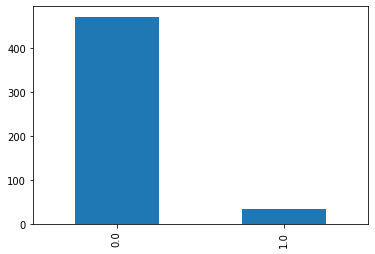

In [28]:
%matplotlib inline
df['CHAS'].value_counts().plot(kind='bar')

Observe que o comando mágico do IPython `% matplotlib inline` permite que você visualize o gráfico inline.

Vamos voltar ao conjunto de dados como um todo por um momento. Duas coisas importantes que você procurará em quase qualquer conjunto de dados são tendências e relacionamentos. Uma relação típica entre as variáveis ​​a explorar é a correlação de Pearson, ou a extensão na qual duas variáveis ​​estão linearmente relacionadas. O método `corr` mostrará isso em formato de tabela para todas as colunas em um` DataFrame`:

In [29]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_50
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.255905
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.590769
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.516001
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.088659
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.597644
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.164465
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.870348
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.673813
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.361191
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.381395


Suponha que você queira apenas examinar as correlações entre todas as colunas e apenas uma variável. Vamos examinar apenas a correlação entre todas as outras variáveis ​​e a porcentagem de casas ocupadas pelos proprietários construídas antes de 1940 (AGE). Faremos isso acessando a coluna por número de índice:

In [30]:
corr = df.corr(method='pearson')
corr_with_homevalue = corr.iloc[-1]
corr_with_homevalue[corr_with_homevalue.argsort()[::-1]]

AGE_50     1.000000
AGE        0.870348
NOX        0.597644
INDUS      0.516001
LSTAT      0.468146
TAX        0.381395
RAD        0.361191
CRIM       0.255905
PTRATIO    0.236216
CHAS       0.088659
RM        -0.164465
B         -0.221818
MEDV      -0.289750
ZN        -0.590769
DIS       -0.673813
Name: AGE_50, dtype: float64

Com as correlações organizadas em ordem decrescente, é fácil começar a ver alguns padrões. Correlacionar AGE com uma variável que criamos a partir de AGE é uma correlação trivial. No entanto, é interessante notar que a porcentagem do estoque de moradias mais antigas nas comunidades está fortemente correlacionada com a poluição do ar (NOX) e a proporção de acres de negócios não varejistas por cidade (INDUS); pelo menos em 1978 na área metropolitana de Boston, as cidades mais antigas são mais industriais.

Graficamente, podemos ver as correlações usando um mapa de calor da biblioteca Seaborn:

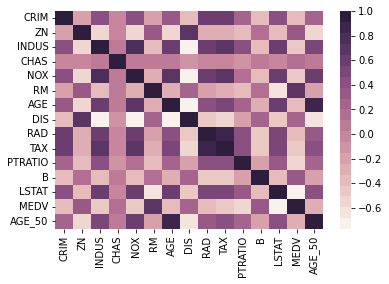

In [32]:
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

Os histogramas são outra ferramenta valiosa para investigar seus dados. Por exemplo, qual é a distribuição geral dos preços das casas ocupadas pelos proprietários na área de Boston?

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

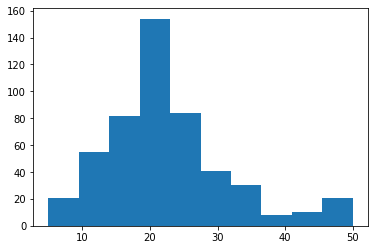

In [33]:
import matplotlib.pyplot as plt
plt.hist(df['MEDV'])

O tamanho do compartimento padrão para o histograma matplotlib (essencialmente grande de grupos de porcentagens que você inclui em cada barra de histograma, neste caso) é muito grande e pode mascarar detalhes menores. Para obter uma visão mais detalhada da coluna AGE, você pode aumentar manualmente o número de compartimentos no histograma:

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

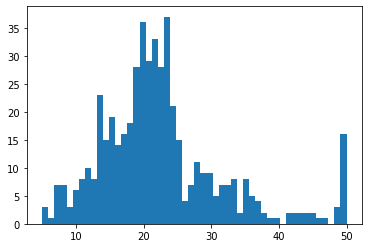

In [34]:
plt.hist(df['MEDV'],bins=50)



Seaborn tem uma versão um pouco mais atraente do histograma matplotlib padrão: o gráfico de distribuição. Este é um gráfico de combinação de histograma e estimativa de densidade do kernel (KDE) (essencialmente um histograma suavizado):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


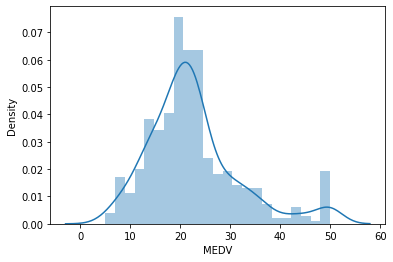

In [35]:
sns.distplot(df['MEDV'])

Outro gráfico comumente usado é o Seaborn jointplot, que combina histogramas para duas colunas junto com um gráfico de dispersão:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


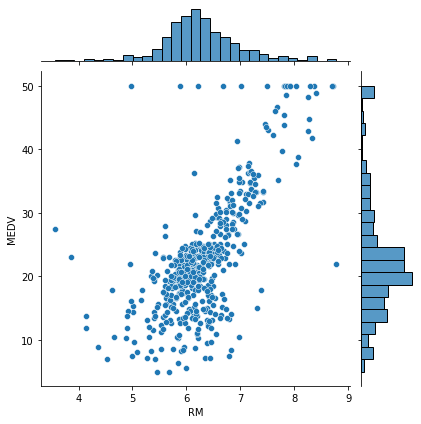

In [36]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter')

Infelizmente, muitos dos pontos são impressos uns sobre os outros. Você pode ajudar a resolver isso adicionando alguma mistura alfa, uma figura que define a transparência para os pontos de forma que as concentrações deles se sobrepondo sejam aparentes:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


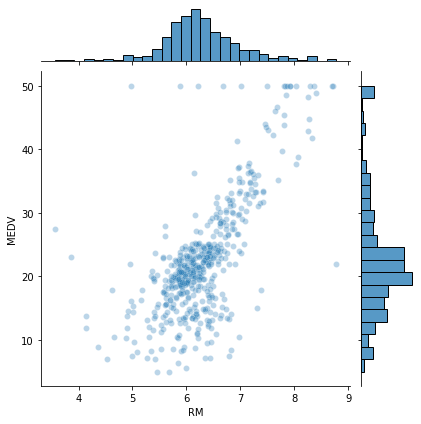

In [37]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter', alpha=0.3)

Outra maneira de ver os padrões em seus dados é com um gráfico bidimensional do KDE. As cores mais escuras aqui representam uma maior concentração de pontos de dados:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


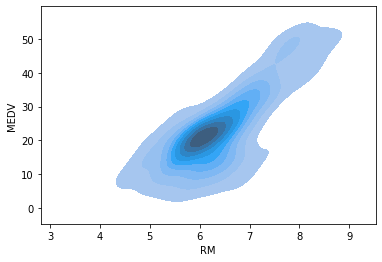

In [38]:
sns.kdeplot(df['RM'], df['MEDV'], shade=True)

Observe que, embora o gráfico do KDE seja muito bom em mostrar concentrações de pontos de dados, estruturas mais refinadas, como relações lineares (como a relação clara entre o número de quartos nas casas e o preço da casa), são perdidas no gráfico do KDE.

Finalmente, o gráfico de pares no Seaborn permite que você veja gráficos de dispersão e histogramas para várias colunas em uma tabela. Aqui, brincamos com algumas das palavras-chave para produzir um gráfico de par mais sofisticado e fácil de ler que incorpora tanto a combinação alfa quanto as linhas de regressão linear para os gráficos de dispersão.

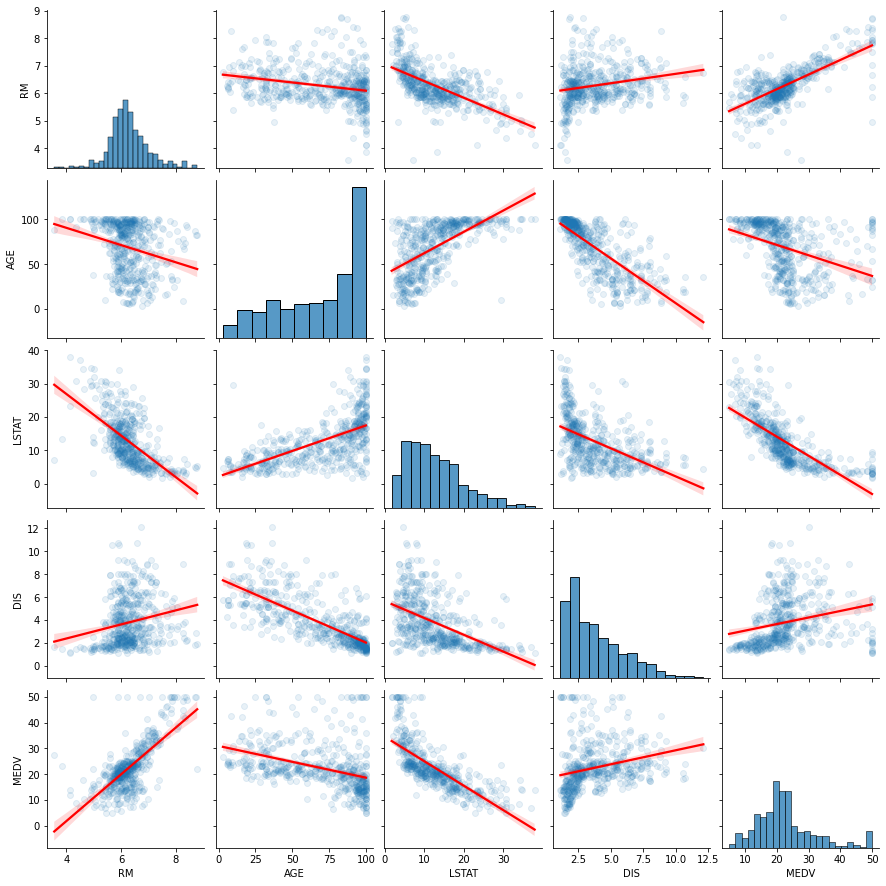

In [39]:
sns.pairplot(df[['RM', 'AGE', 'LSTAT', 'DIS', 'MEDV']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

A visualização é o início da parte realmente legal e divertida da ciência de dados. Portanto, experimente essas ferramentas de visualização e veja o que você pode aprender com os dados!

&gt; ** Conclusão: ** Uma velha piada diz: “O que um cientista de dados vê quando olha para um conjunto de dados? Um monte de números. ” Há mais do que um pouco de verdade nessa piada. A visualização geralmente é a chave para encontrar padrões e correlações em seus dados. Embora a visualização muitas vezes não possa fornecer resultados precisos, ela pode indicar a direção certa para fazer perguntas melhores e encontrar valor nos dados de maneira eficiente.